# REFINITIV ANALYST CONSENSUS

### Instructions

Please input a valid RIC after running the first and second cell below. Then you can run the rest of the notebook using shift+enter for each cell sequentially. 

This notebook will provide all of the information contained in the popular Eikon/Workspace template of the same name. This includes some general information about the company, growth, valuation, and then a dropdown selector allows you to select details for 12 consensus estimate measures. 

In [14]:
import refinitiv.data as rd
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import Box
import matplotlib as plt
import warnings
%matplotlib inline
plt.style.use("seaborn")
warnings.filterwarnings("ignore")

rd.open_session()

<refinitiv.data.session.Definition object at 0x17634fee0 {name='workspace'}>

### Select RIC

In [15]:
ric = widgets.Text(
    value='',
    placeholder='Type something',
    description='RIC:',
    disabled=False
)

items = [ric]
box = Box(children=items)

box

Box(children=(Text(value='', description='RIC:', placeholder='Type something'),))

### About

In [17]:
df = rd.get_data(ric.value, ["TR.HeadquartersCountry", "TR.ExchangeName",
                 "TR.TRBCIndustryGroup", "TR.GICSSector", "TR.TickerSymbol"])
df.transpose()

,0
Instrument,VOD.L
Country of Headquarters,United Kingdom
Exchange Name,LONDON STOCK EXCHANGE
TRBC Industry Group Name,Telecommunications Services
GICS Sector Name,Communication Services
Ticker Symbol,VOD


### General Information I

In [18]:
df1 = rd.get_data(ric.value, ["CF_CURR", "TR.PriceClose", "TR.Price52WeekHigh",
                  "TR.Price52WeekLow", "TR.PriceTargetMedian", "TR.InterimFrequency"])
df1.transpose()

,0
Instrument,VOD.L
Price Close,101.22
Price 52 Week High,132.3
Price 52 Week Low,83.237
Price Target - Median,114.72243
Interim Frequency,Semi-Annual
CF_CURR,2008


### General Information II

In [19]:
df2 = rd.get_data(ric.value, ["TR.DividendYield", "TR.PriceClose(sdate=FY0)", "TR.EPSActvalue(Period=FY0)",
                              "TR.PtoEPSMeanEst(Period=FY1)", "TR.SharesOutstanding(Scale=6)", "TR.CompanyMarketCap",
                              "TR.CompanyMarketCap().currency"])
if df2['Currency'][0] == df1['CF_CURR'][0]:
    df2['PE FY0'] = df2['Price Close']/df2['Earnings Per Share - Actual']
else:
    df2['PE FY0'] = (df2['Price Close']/100)/df2['Earnings Per Share - Actual']

df2.transpose()

,0
Instrument,VOD.L
Dividend yield,7.650978
Price Close,84.24
Earnings Per Share - Actual,0.11
Price / EPS (Mean Estimate),11.176096
Outstanding Shares,27040.929411
Company Market Cap,27370828749.814201
Currency,GBP
PE FY0,7.658182


### Growth

In [20]:
df3 = rd.get_data(ric.value, ['TR.EPSActValue(period=FY0)', 'TR.EPSMeanEstimate(period=FY1)',
                              'TR.EPSMeanEstimate(period=FY2)', 'TR.EPSMeanEstimate(period=FY3)',
                              'TR.RevenueActValue(Period=FY0)', 'TR.RevenueMeanEstimate(Period=FY1)',
                              'TR.RevenueMeanEstimate(Period=FY2)', 'TR.RevenueMeanEstimate(Period=FY3)',
                              ])
df3.columns = ['RIC', 'EPS-FY0', 'EPS-FY1', 'EPS-FY2',
               'EPS-FY3', 'SALES-FY0', 'SALES-FY1', 'SALES-FY2', 'SALES-FY3']
df3['EPS-FY1/FY0'] = (df3['EPS-FY1']/df3['EPS-FY0']-1)*100
df3['EPS-FY2/FY1'] = (df3['EPS-FY2']/df3['EPS-FY1']-1)*100
df3['EPS-FY3/FY2'] = (df3['EPS-FY3']/df3['EPS-FY2']-1)*100
df3['SALES-FY1/FY0'] = (df3['SALES-FY1']/df3['SALES-FY0']-1)*100
df3['SALES-FY2/FY1'] = (df3['SALES-FY2']/df3['SALES-FY1']-1)*100
df3['SALES-FY3/FY2'] = (df3['SALES-FY3']/df3['SALES-FY2']-1)*100

df3.iloc[:, 9:].transpose()

,0
EPS-FY1/FY0,-7.672727
EPS-FY2/FY1,-2.333596
EPS-FY3/FY2,12.995262
SALES-FY1/FY0,0.62522
SALES-FY2/FY1,-1.027959
SALES-FY3/FY2,0.856733


<AxesSubplot: >

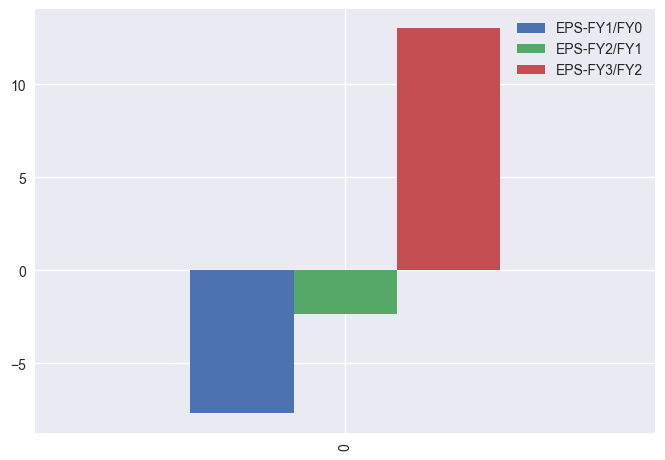

In [21]:
df3.iloc[:, 9:12].plot(kind='bar')

<AxesSubplot: >

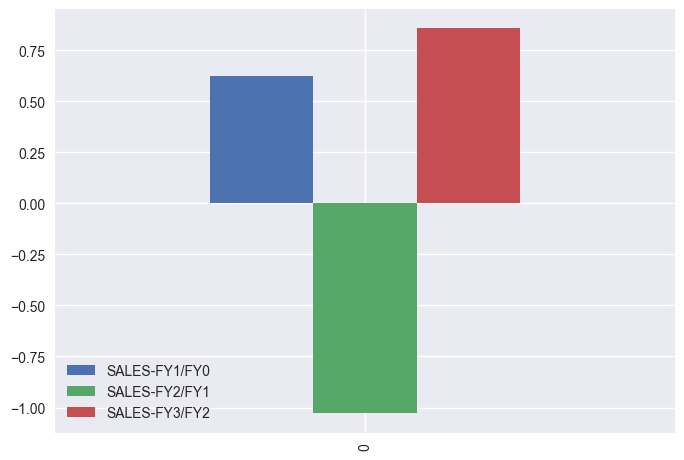

In [22]:
df3.iloc[:, 12:16].plot(kind='bar')

### Valuation

In [9]:
df5 = rd.get_data(ric.value, ['TR.PtoEPSMeanEst(SDate=0,EDate=2,Period=FY1,Frq=FY).rfperiod',
                  'TR.PtoEPSMeanEst(SDate=0,EDate=2,Period=FY1,Frq=FY)', 'TR.PtoREVMeanEst(SDate=0,EDate=2,Period=FY1,Frq=FY)'])
df5

,Instrument,Financial Period Relative,Price / EPS (Mean Estimate),Price / Revenue (Mean Estimate)
0,VOD.L,FY1,9.360114,0.565179
1,VOD.L,FY2,11.427063,0.675197
2,VOD.L,FY3,10.12709,0.670403


### Consensus Forecasts Information

In [10]:
mSel = widgets.Dropdown(
    options=['BVPS', 'CFPS', 'DPS', 'EPS', 'EBIT', 'EBITDA', 'NETDEBT', 'NETPROFIT', 'PRETAXPROFIT',
             'ROA', 'ROE', 'REVENUE'],  # just a sellection you can add any more you want here
    value='BVPS',
    description='Metric:',
    disabled=False,
)

items2 = [mSel]
box2 = Box(children=items2)
box2

Box(children=(Dropdown(description='Metric:', options=('BVPS', 'CFPS', 'DPS', 'EPS', 'EBIT', 'EBITDA', 'NETDEB…

In [11]:
try:
    df5 = rd.get_data(ric.value, ['TR.'+mSel.value+'Mean(SDate=0,EDate=2,Period=FY1,Frq=FY).fperiod', 'TR.'+mSel.value+'Mean(SDate=0,EDate=2,Period=FY1,Frq=FY)', 'TR.'+mSel.value +
                      'High(SDate=0,EDate=2,Period=FY1,Frq=FY)', 'TR.'+mSel.value+'Low(SDate=0,EDate=2,Period=FY1,Frq=FY)', 'TR.'+mSel.value+'Median(SDate=0,EDate=2,Period=FY1,Frq=FY)'])
    display(df5)
except:
    print('Metric not available for this company, please select another metric')

,Instrument,Financial Period Absolute,Book Value Per Share - Mean,Book Value Per Share - High,Book Value Per Share - Low,Book Value Per Share - Median
0,VOD.L,FY2023,1.977,2.108,1.84,1.99
1,VOD.L,FY2024,1.998,2.155,1.84,2.0
2,VOD.L,FY2025,2.08186,2.239,1.894,2.12


In [12]:
if df1['Interim Frequency'][0] == 'Quarterly':
    try:
        df6 = rd.get_data(ric.value, ['TR.'+mSel.value+'Mean(SDate=0,EDate=2,Period=FQ1,Frq=FQ).fperiod', 'TR.'+mSel.value+'Mean(SDate=0,EDate=2,Period=FQ1,Frq=FQ)', 'TR.'+mSel.value +
                          'High(SDate=0,EDate=2,Period=FQ1,Frq=FQ)', 'TR.'+mSel.value+'Low(SDate=0,EDate=2,Period=FQ1,Frq=FQ)', 'TR.'+mSel.value+'Median(SDate=0,EDate=2,Period=FQ1,Frq=FQ)'])
        display(df6)
    except:
        print('Metric not available for this company, please select another metric')
else:
    try:
        df6 = rd.get_data(ric.value, ['TR.'+mSel.value+'Mean(SDate=0,EDate=2,Period=FI1,Frq=FI).fperiod', 'TR.'+mSel.value+'Mean(SDate=0,EDate=2,Period=FI1,Frq=FI)', 'TR.'+mSel.value +
                          'High(SDate=0,EDate=2,Period=FI1,Frq=FI)', 'TR.'+mSel.value+'Low(SDate=0,EDate=2,Period=FI1,Frq=FI)', 'TR.'+mSel.value+'Median(SDate=0,EDate=2,Period=FI1,Frq=FI)'])
        display(df6)
    except:
        print('Metric not available for this company, please select another metric')

,Instrument,Financial Period Absolute,Book Value Per Share - Mean,Book Value Per Share - High,Book Value Per Share - Low,Book Value Per Share - Median
0,VOD.L,,,,,


In [13]:
rd.close_session()

**Further Resources for Refinitiv Data Libraries API on Developer Community Portal**

* [Overview](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python) 
* [Quick Start ](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start)
* [Documentation](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/documentation)
* [Tutorials](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/tutorials)
* [Q&A Forums](https://community.developers.refinitiv.com/spaces/321/index.html)